In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 로드
data = pd.read_csv('Mall_Customers.csv')

# 불필요한 컬럼 제거
data_cleaned = data.drop(columns=['CustomerID', 'Gender'])


In [8]:
# 결측치 확인
missing_values = data_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [52]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: 데이터 로드 및 전처리
data = pd.read_csv('Mall_Customers.csv')

# 불필요한 컬럼 제거
data_cleaned = data.drop(columns=['CustomerID', 'Gender'])

# 결측치 확인 및 제거
missing_values = data_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)
data_cleaned = data_cleaned.dropna()

# Step 2: 데이터 분리 (훈련 데이터와 평가 데이터)
X = data_cleaned  # 독립 변수
y = pd.Series([0] * len(X))  # Placeholder 타겟 변수 (클러스터링 결과 기반으로 생성할 예정)

# 훈련 데이터와 평가 데이터 분리
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 3: 훈련 데이터에서 이상치 처리
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_train = ((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)
X_train_cleaned = X_train[~outliers_train]

print(f"훈련 데이터 이상치 제거 전 크기: {len(X_train)}")
print(f"훈련 데이터 이상치 제거 후 크기: {len(X_train_cleaned)}")

Missing Values:
 Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
훈련 데이터 이상치 제거 전 크기: 160
훈련 데이터 이상치 제거 후 크기: 158


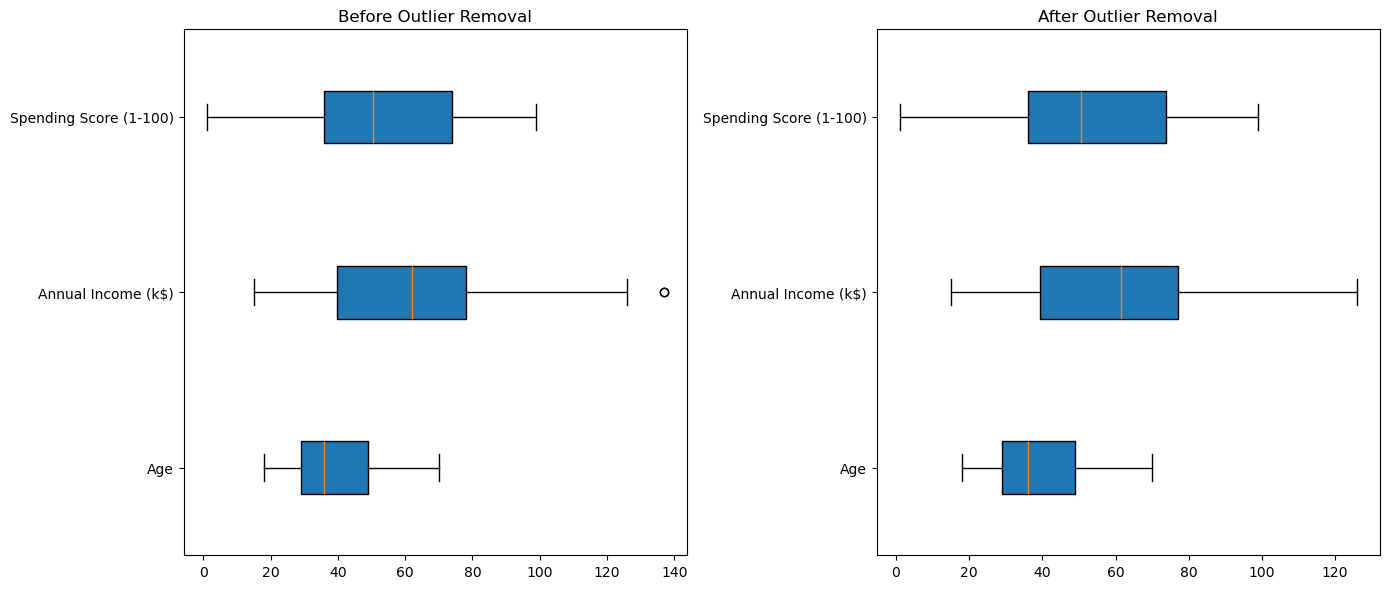

In [56]:
import matplotlib.pyplot as plt

# Step 1: 이상치 제거 전 데이터
original_data = X_train  # 이상치 제거 전 데이터

# Step 2: 이상치 제거 후 데이터
cleaned_data = X_train_cleaned  # 이상치 제거 후 데이터

# Step 3: 박스플롯 시각화
plt.figure(figsize=(14, 6))

# 이상치 제거 전 데이터
plt.subplot(1, 2, 1)
plt.boxplot(original_data.values, vert=False, patch_artist=True, tick_labels=original_data.columns)
plt.title('Before Outlier Removal')

# 이상치 제거 후 데이터
plt.subplot(1, 2, 2)
plt.boxplot(cleaned_data.values, vert=False, patch_artist=True, tick_labels=cleaned_data.columns)
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()


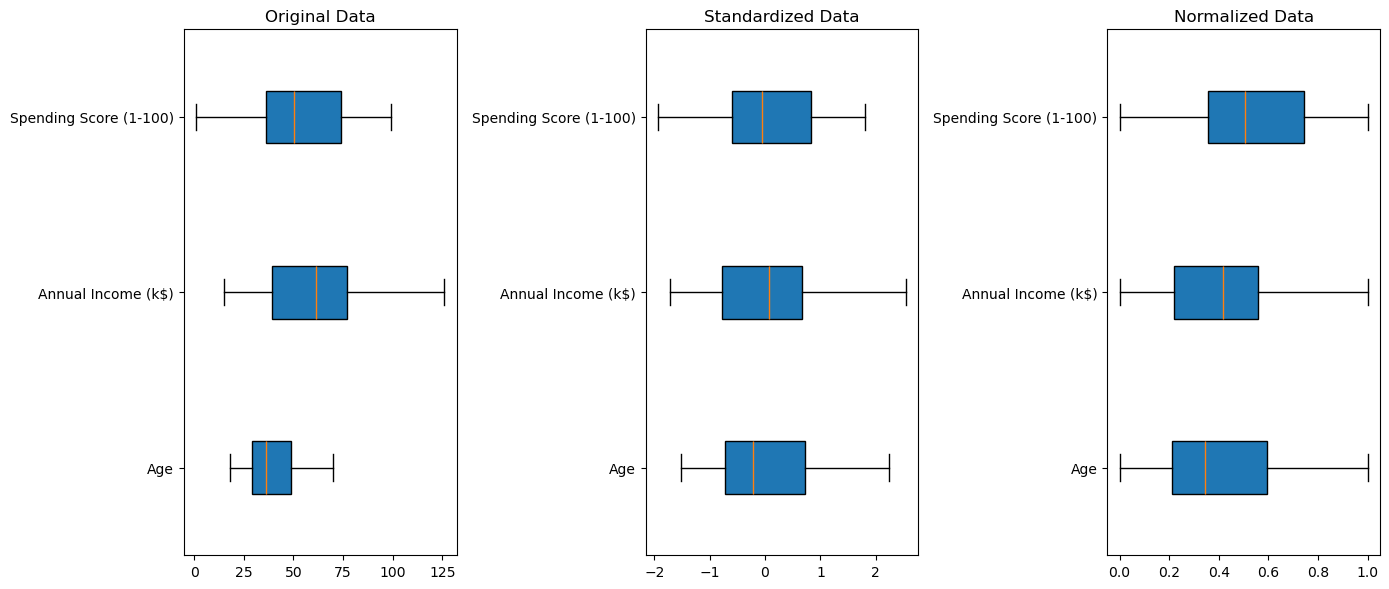

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: 데이터 준비
# 훈련 데이터만 사용 (이상치 제거된 데이터)
data = X_train_cleaned.copy()

# Step 2: 표준화
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data)
data_standardized_df = pd.DataFrame(data_standardized, columns=data.columns)

# Step 3: 정규화
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)
data_normalized_df = pd.DataFrame(data_normalized, columns=data.columns)

# Step 4: 시각화 (Boxplot)
plt.figure(figsize=(14, 6))

# 원본 데이터
plt.subplot(1, 3, 1)
plt.boxplot(data.values, vert=False, patch_artist=True, tick_labels=data.columns)
plt.title('Original Data')

# 표준화 데이터
plt.subplot(1, 3, 2)
plt.boxplot(data_standardized_df.values, vert=False, patch_artist=True, tick_labels=data.columns)
plt.title('Standardized Data')

# 정규화 데이터
plt.subplot(1, 3, 3)
plt.boxplot(data_normalized_df.values, vert=False, patch_artist=True, tick_labels=data.columns)
plt.title('Normalized Data')

plt.tight_layout()
plt.show()


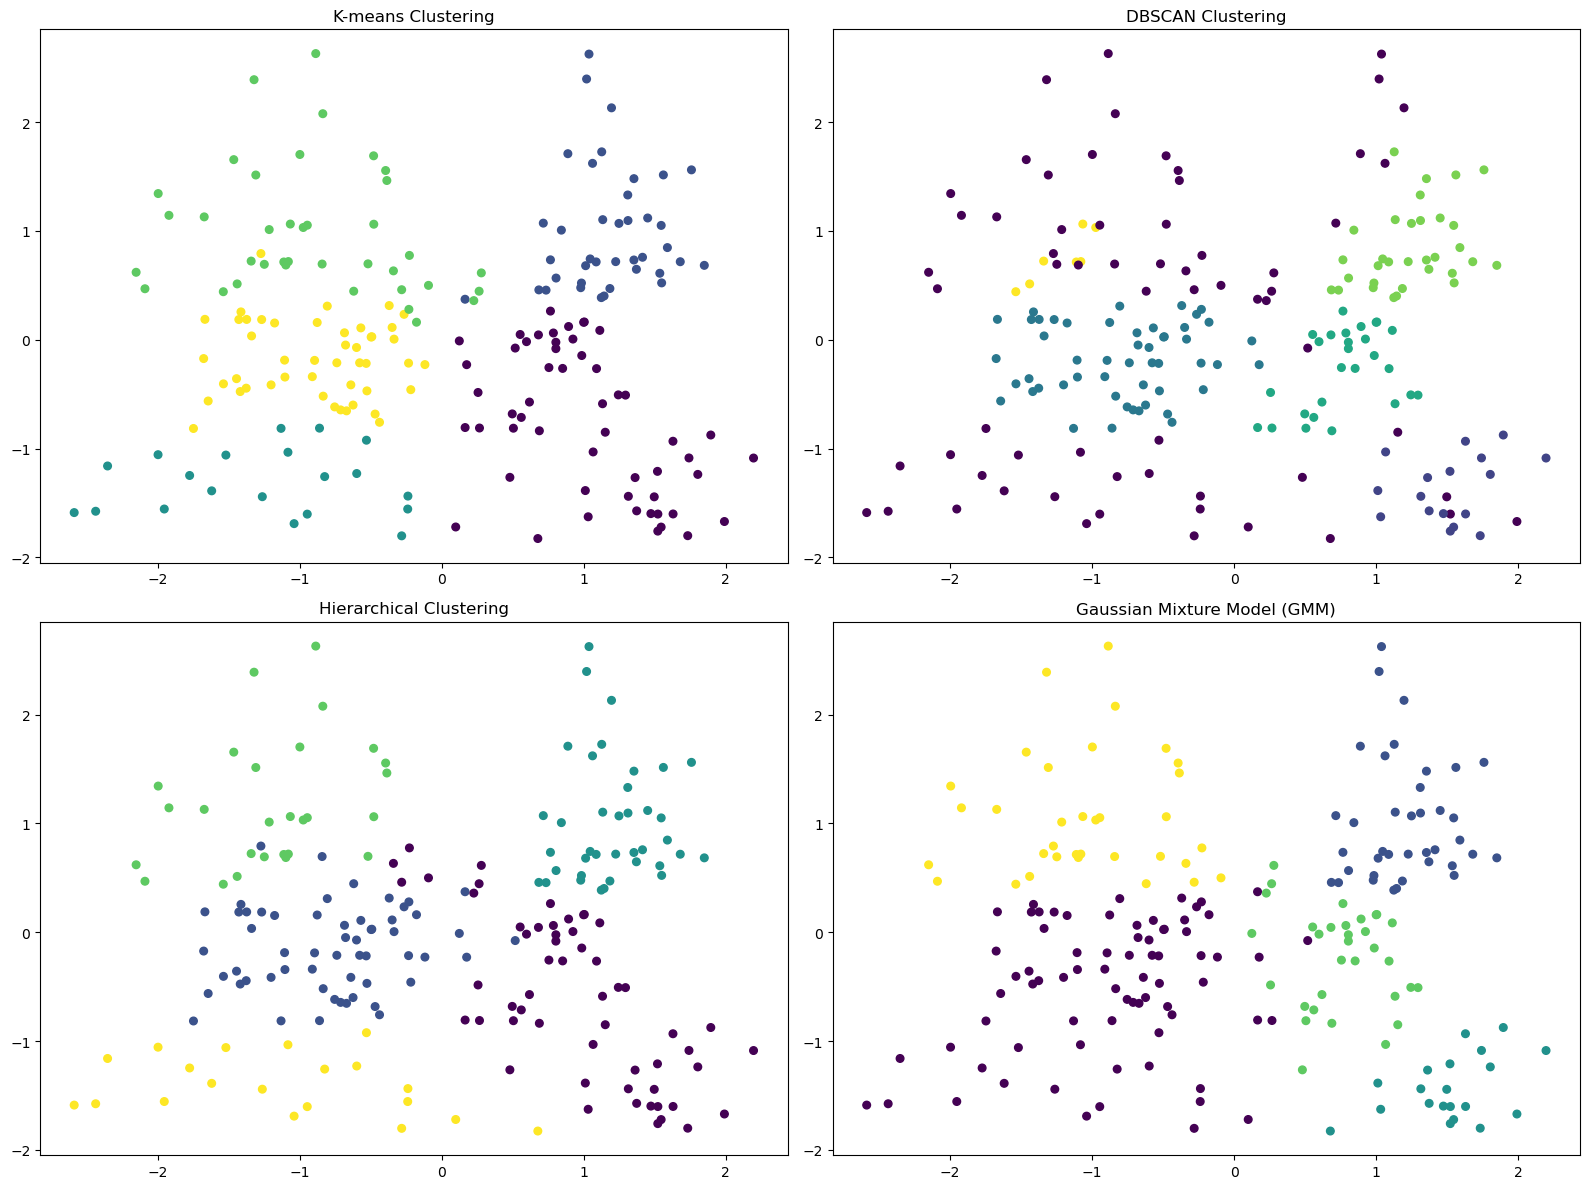

K-means: Silhouette Score = 0.4211865917376424
DBSCAN: Silhouette Score = 0.21043372596244786
Hierarchical: Silhouette Score = 0.40068972298854116
GMM: Silhouette Score = 0.37892707809915926


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: 데이터 준비 (정규화된 데이터 사용)
data = scaled_df_no_outliers.values  # 이전에 정규화된 데이터 사용

# Step 2: PCA를 사용해 데이터 차원 축소 (2D 시각화를 위해)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Step 3: 클러스터링 알고리즘 적용
# (1) K-means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data)

# (2) DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)

# (3) Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data)

# (4) Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(data)

# Step 4: Silhouette Score 계산
algorithms = ['K-means', 'DBSCAN', 'Hierarchical', 'GMM']
labels_list = [kmeans_labels, dbscan_labels, hierarchical_labels, gmm_labels]

silhouette_scores = []
for labels in labels_list:
    if len(set(labels)) > 1:  # 클러스터가 2개 이상일 때만 계산
        score = silhouette_score(data, labels)
    else:
        score = np.nan  # DBSCAN처럼 하나의 클러스터만 생성된 경우
    silhouette_scores.append(score)

# Step 5: 시각화
plt.figure(figsize=(16, 12))

# K-means
plt.subplot(2, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title('K-means Clustering')

# DBSCAN
plt.subplot(2, 2, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dbscan_labels, cmap='viridis', s=30)
plt.title('DBSCAN Clustering')

# Hierarchical
plt.subplot(2, 2, 3)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=hierarchical_labels, cmap='viridis', s=30)
plt.title('Hierarchical Clustering')

# GMM
plt.subplot(2, 2, 4)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=gmm_labels, cmap='viridis', s=30)
plt.title('Gaussian Mixture Model (GMM)')

plt.tight_layout()
plt.show()

# Step 6: Silhouette Score 출력
for algo, score in zip(algorithms, silhouette_scores):
    print(f"{algo}: Silhouette Score = {score if not np.isnan(score) else 'Not Applicable'}")


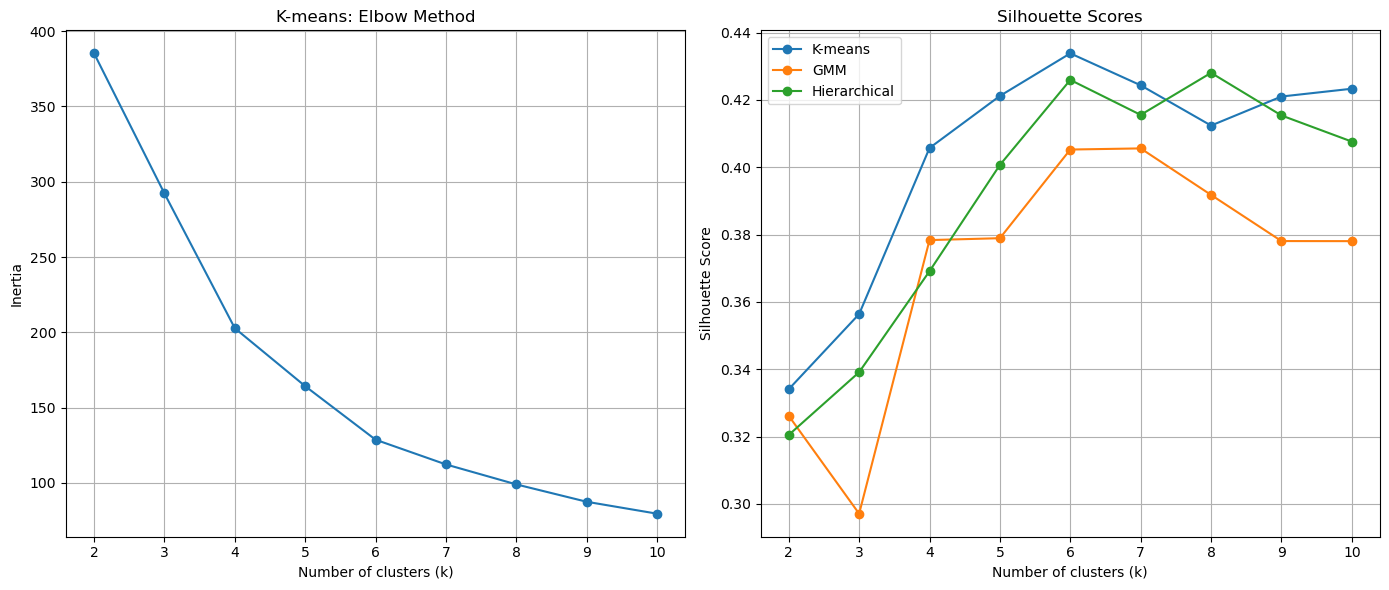

Optimal k for K-means: 6
Optimal k for GMM: 7
Optimal k for Hierarchical: 8


In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Step 1: 데이터 준비 (정규화된 데이터 사용)
data = scaled_df_no_outliers.values  # 정규화된 데이터

# Step 2: 클러스터 수 범위 정의
cluster_range = range(2, 11)  # 2에서 10까지의 클러스터 수 탐색

# 결과 저장용
kmeans_inertia = []
kmeans_silhouette = []
gmm_silhouette = []
hierarchical_silhouette = []

# Step 3: 최적 k 탐색
for k in cluster_range:
    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(data)
    kmeans_inertia.append(kmeans.inertia_)
    kmeans_silhouette.append(silhouette_score(data, kmeans_labels))
    
    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(data)
    gmm_silhouette.append(silhouette_score(data, gmm_labels))
    
    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(data)
    hierarchical_silhouette.append(silhouette_score(data, hierarchical_labels))

# Step 4: 엘보우 방법과 실루엣 점수 시각화
plt.figure(figsize=(14, 6))

# K-means: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(cluster_range, kmeans_inertia, marker='o')
plt.title('K-means: Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()

# K-means: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, kmeans_silhouette, marker='o', label='K-means')
plt.plot(cluster_range, gmm_silhouette, marker='o', label='GMM')
plt.plot(cluster_range, hierarchical_silhouette, marker='o', label='Hierarchical')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Step 5: 최적 k 결과 출력
optimal_k_kmeans = cluster_range[kmeans_silhouette.index(max(kmeans_silhouette))]
optimal_k_gmm = cluster_range[gmm_silhouette.index(max(gmm_silhouette))]
optimal_k_hierarchical = cluster_range[hierarchical_silhouette.index(max(hierarchical_silhouette))]

print(f"Optimal k for K-means: {optimal_k_kmeans}")
print(f"Optimal k for GMM: {optimal_k_gmm}")
print(f"Optimal k for Hierarchical: {optimal_k_hierarchical}")


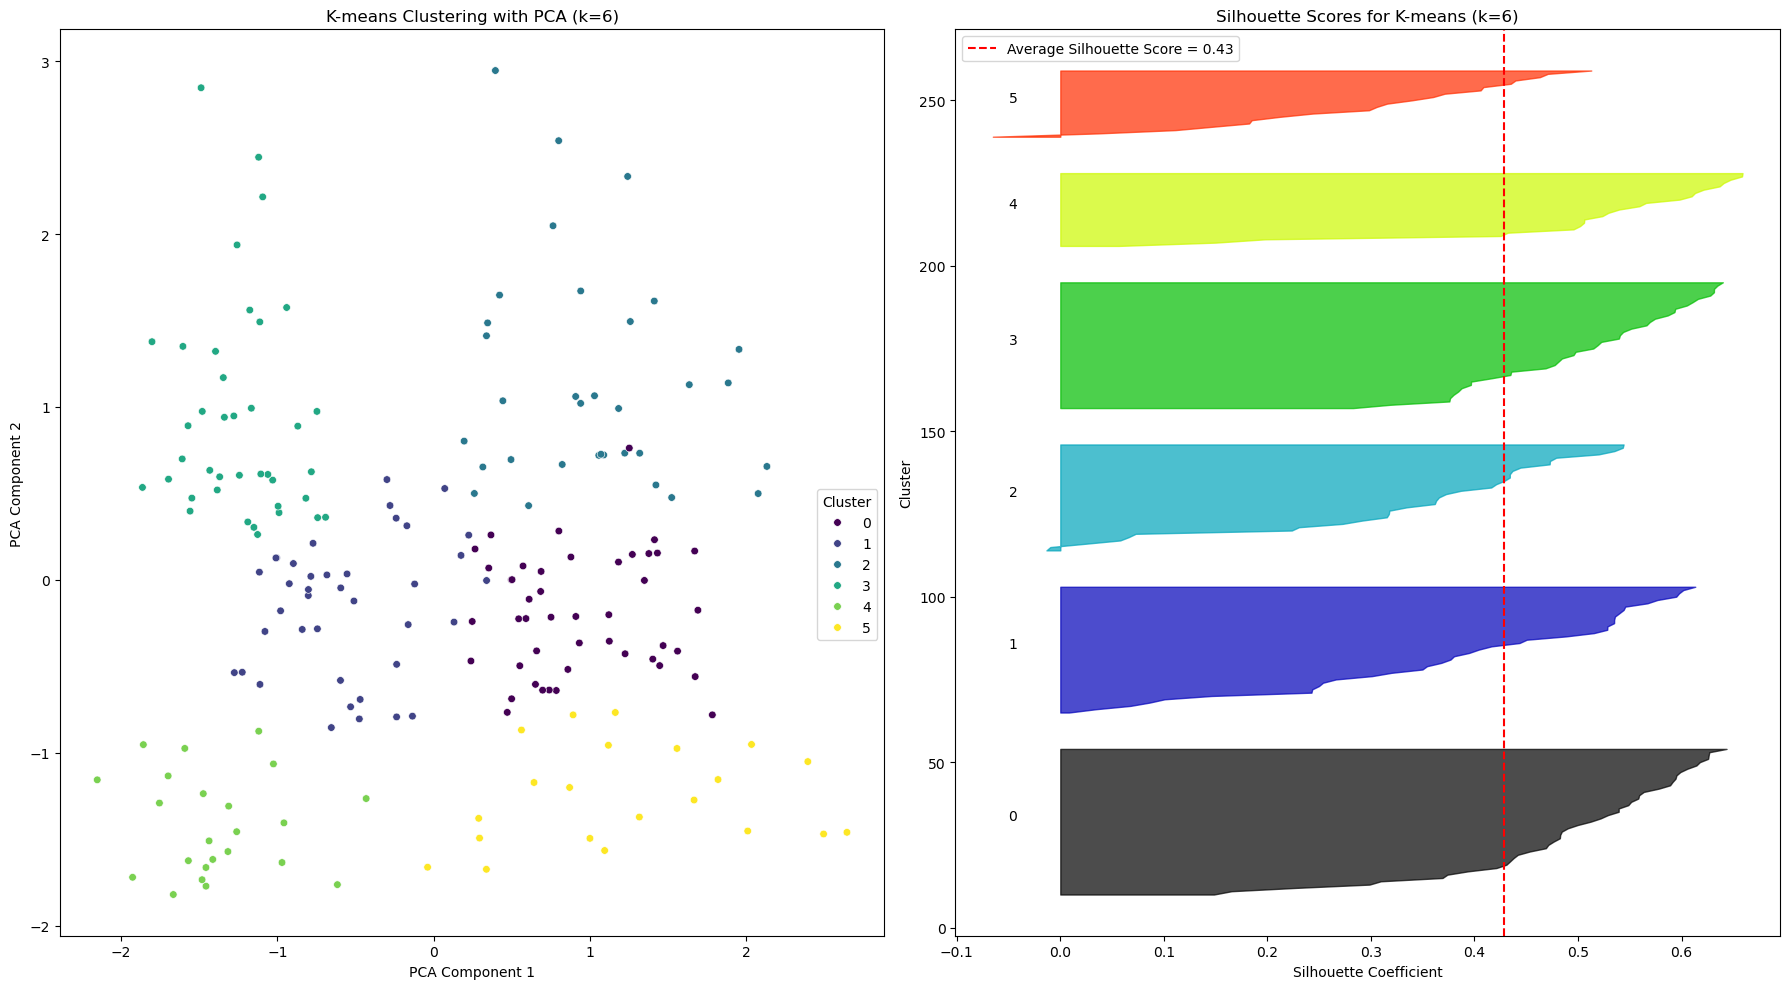

Average Silhouette Score: 0.43


In [68]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = 'Mall_Customers.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Preprocessing: Removing unnecessary columns and scaling
data_cleaned = data.drop(columns=['CustomerID', 'Gender'])  # Removing non-numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Step 1: K-means Clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the dataframe
data_cleaned['Cluster'] = kmeans_labels

# Step 2: PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_data)

# Step 3: Silhouette Score Calculation
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
sample_silhouette_values = silhouette_samples(scaled_data, kmeans_labels)

# Step 4: Visualization
plt.figure(figsize=(18, 10))

# (1) PCA-based visualization of cluster distribution
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=kmeans_labels, palette='viridis', s=30)
plt.title("K-means Clustering with PCA (k=6)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 0.5))

# (2) Silhouette Score distribution
plt.subplot(1, 2, 2)
y_lower = 10
for i in range(6):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 6)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples gap

plt.title("Silhouette Scores for K-means (k=6)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average Silhouette Score = {silhouette_avg:.2f}")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Display the average silhouette score
print(f"Average Silhouette Score: {silhouette_avg:.2f}")


IndexError: index 2 is out of bounds for axis 1 with size 2

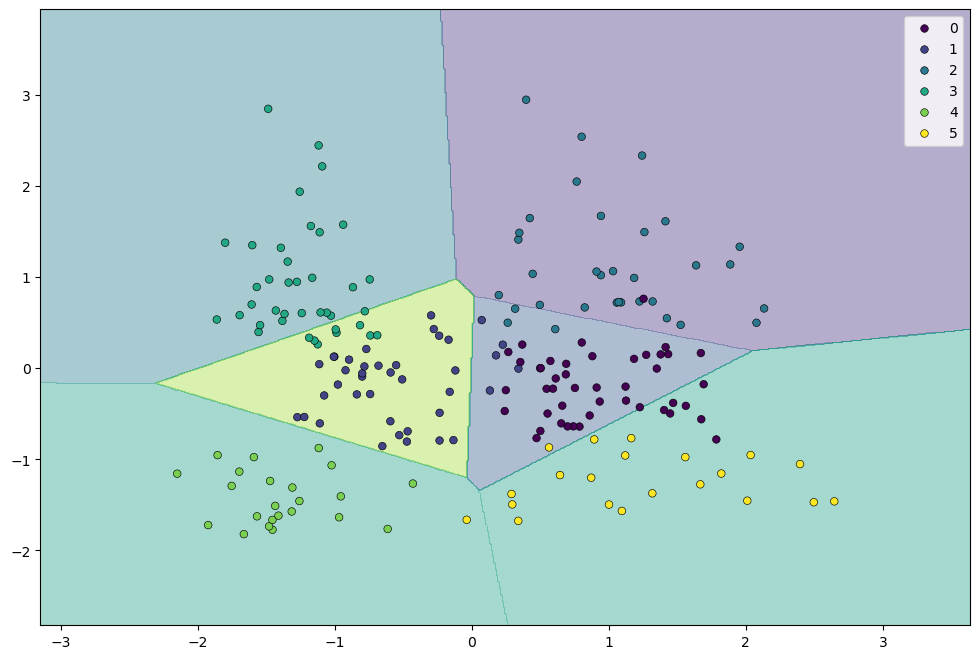

In [80]:
# Refit K-means with 2D PCA-transformed data
kmeans_2d = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_2d.fit(data_2d)

# Create a meshgrid for the decision boundary
x_min, x_max = data_2d[:, 0].min() - 1, data_2d[:, 0].max() + 1
y_min, y_max = data_2d[:, 1].min() - 1, data_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict clusters for each point in the grid
Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

center = kmeans_2d.cluster_centers_
# Plot decision boundaries
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(sns.color_palette("viridis", n_colors=6)))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=kmeans_labels, palette='viridis', s=30, edgecolor='k')
plt.scatter(center[:,1],center[:,2],c='red',maker = 'x')
plt.title("K-means Clustering with Decision Boundaries (PCA-transformed data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 0.5))
plt.show()


In [71]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Step 1: K-means 클러스터링
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
data_kmeans = scaled_df_no_outliers.copy()  # 정규화된 데이터 사용
data_kmeans['Cluster'] = kmeans.fit_predict(data_kmeans)

# Step 2: 구매 가능성 타깃 생성
# 클러스터 0을 구매 가능성이 높은 그룹으로 가정 (예: 타겟 변수 생성)
data_kmeans['Purchase_Likelihood'] = (data_kmeans['Cluster'] == 0).astype(int)

# 독립 변수(X)와 타깃 변수(y) 분리
X = data_kmeans.drop(columns=['Cluster', 'Purchase_Likelihood'])
y = data_kmeans['Purchase_Likelihood']

# Step 3: 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Random Forest 분류 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 5: 모델 평가
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.95      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

Accuracy: 0.975


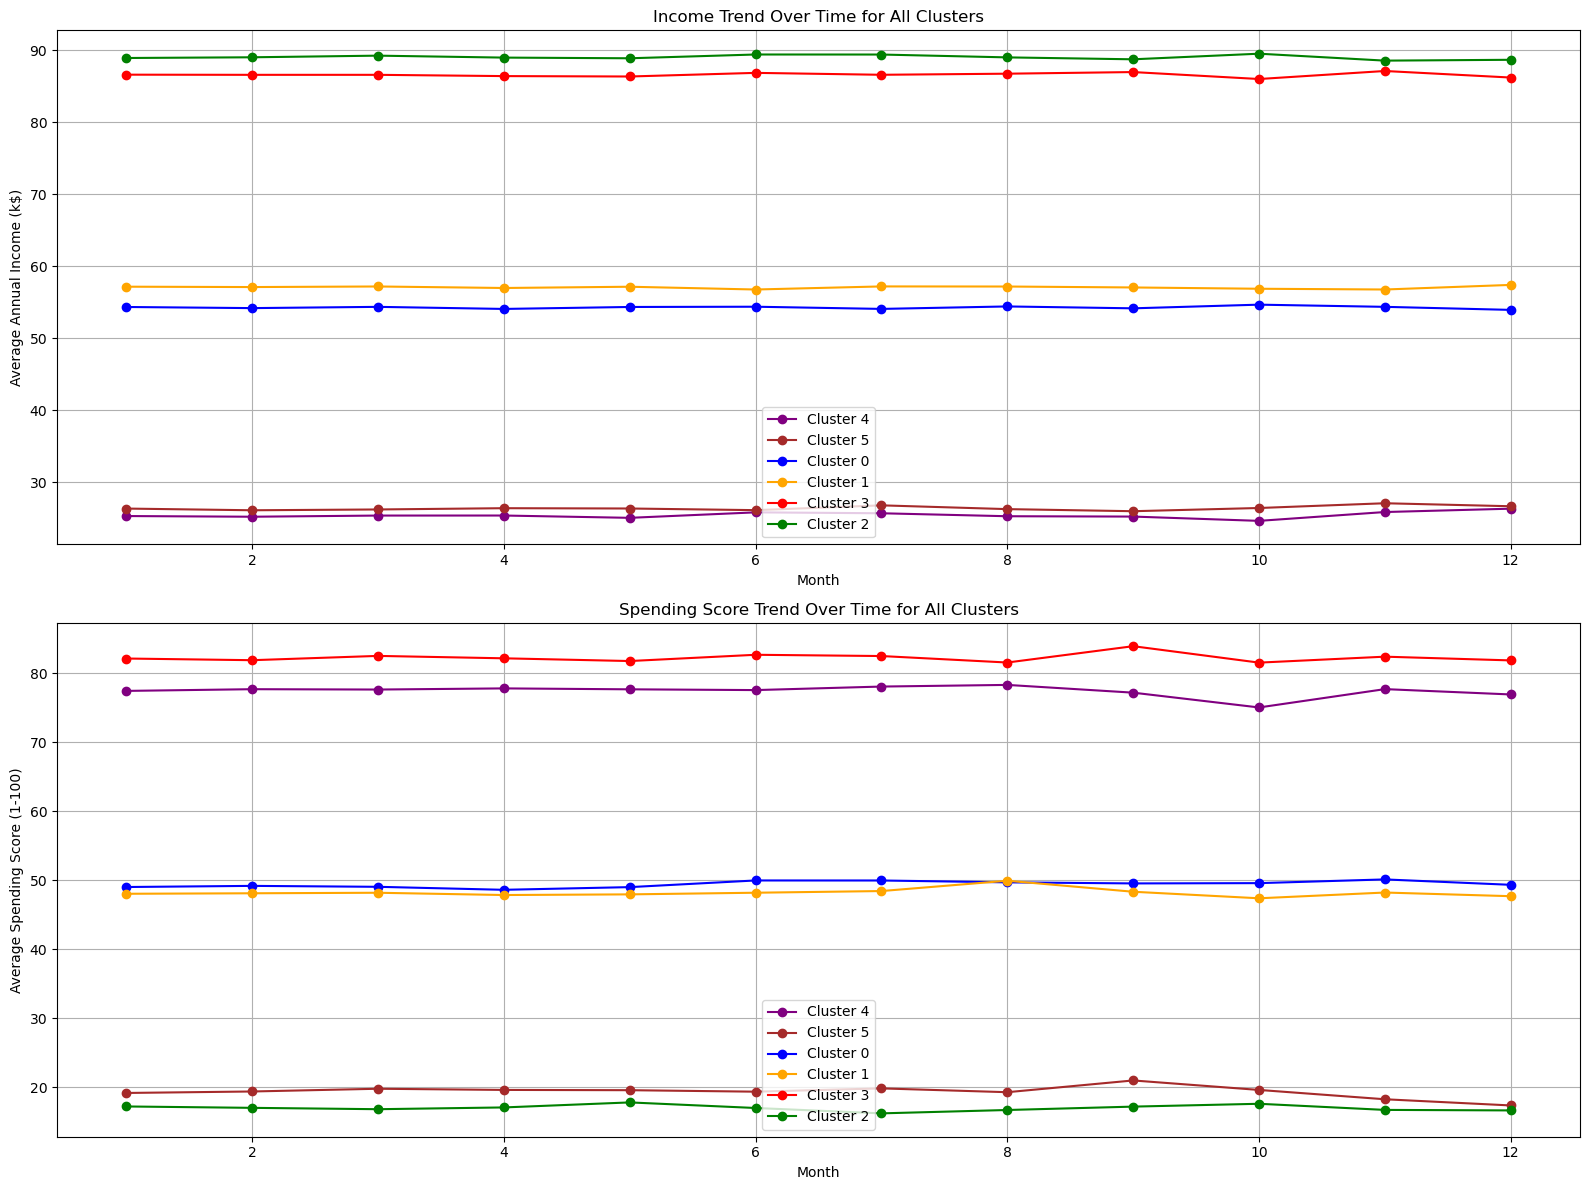

In [73]:
# Step 2 (Extended): Analyze trends for all clusters
all_clusters_trends = {}

# Calculate trends for each cluster
for cluster in clusters:
    cluster_trend = time_series_df[time_series_df['Cluster'] == cluster]
    monthly_trends = cluster_trend.groupby('Month').mean()[['Annual Income (k$)', 'Spending Score (1-100)']]
    all_clusters_trends[cluster] = monthly_trends

# Step 3: Visualization for all clusters
plt.figure(figsize=(16, 12))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Plot Income Trend for each cluster
plt.subplot(2, 1, 1)
for cluster, trends in all_clusters_trends.items():
    plt.plot(trends.index, trends['Annual Income (k$)'], marker='o', label=f'Cluster {cluster}', color=colors[cluster])
plt.title("Income Trend Over Time for All Clusters")
plt.xlabel("Month")
plt.ylabel("Average Annual Income (k$)")
plt.grid(True)
plt.legend()

# Plot Spending Score Trend for each cluster
plt.subplot(2, 1, 2)
for cluster, trends in all_clusters_trends.items():
    plt.plot(trends.index, trends['Spending Score (1-100)'], marker='o', label=f'Cluster {cluster}', color=colors[cluster])
plt.title("Spending Score Trend Over Time for All Clusters")
plt.xlabel("Month")
plt.ylabel("Average Spending Score (1-100)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
